In [1]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.manifold import MDS

from sklearn import manifold, datasets
import pandas as pd

liste_dataset=["Atom","Chainlink","EngyTime","GolfBall","Hepta","Lsun","Target","Tetra","TwoDiamonds","WingNut"]

standard: 26 sec
standard: 9.3 sec
standard: 8.1e+02 sec
standard: 5.2e+02 sec
standard: 0.33 sec
standard: 1.9 sec
standard: 13 sec
standard: 2.7 sec
standard: 7.9 sec
standard: 22 sec


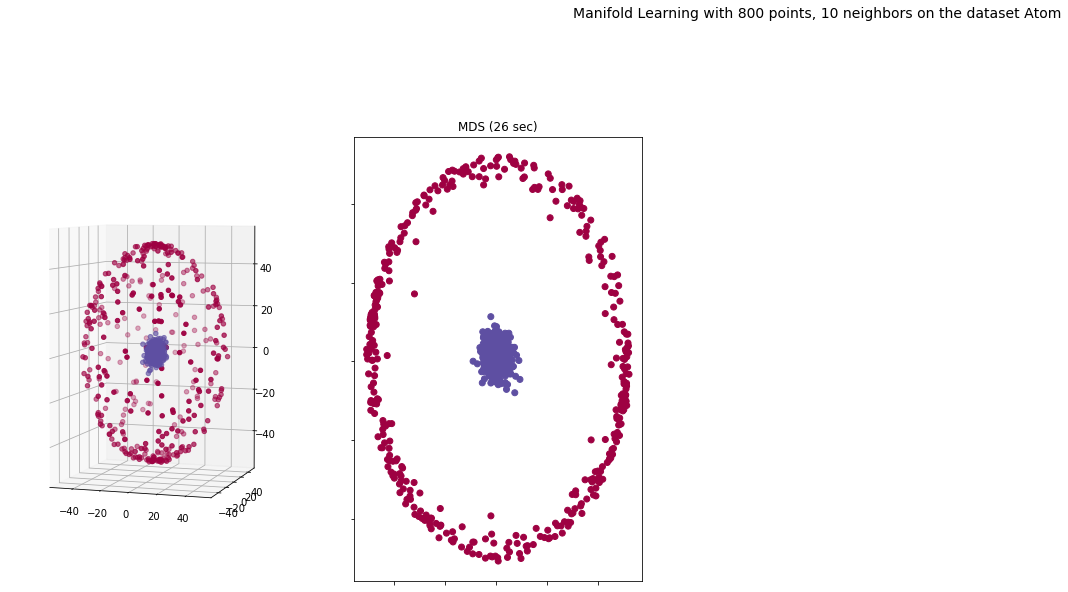

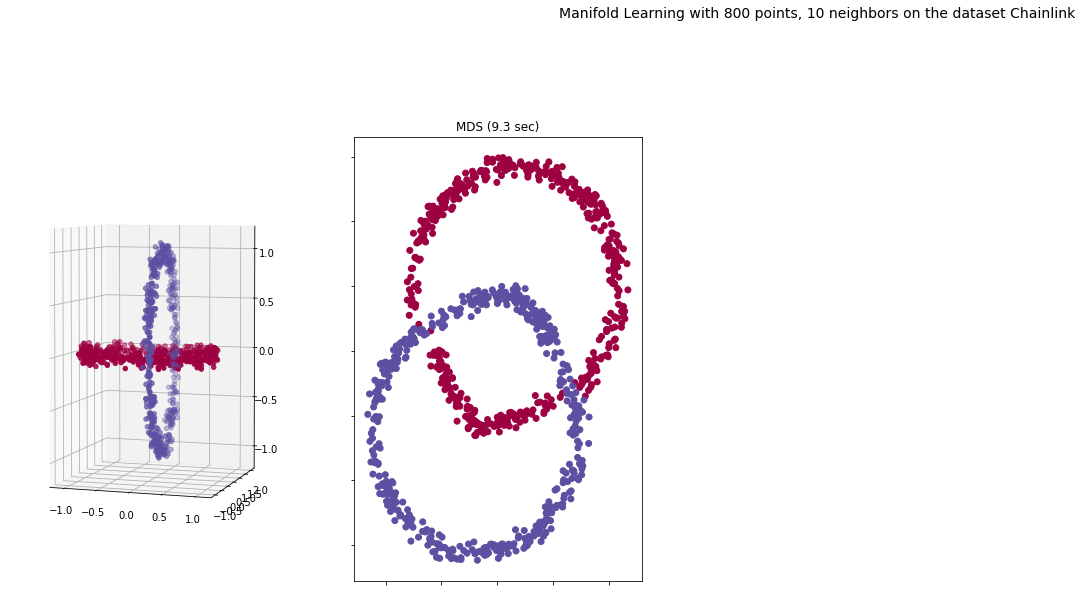

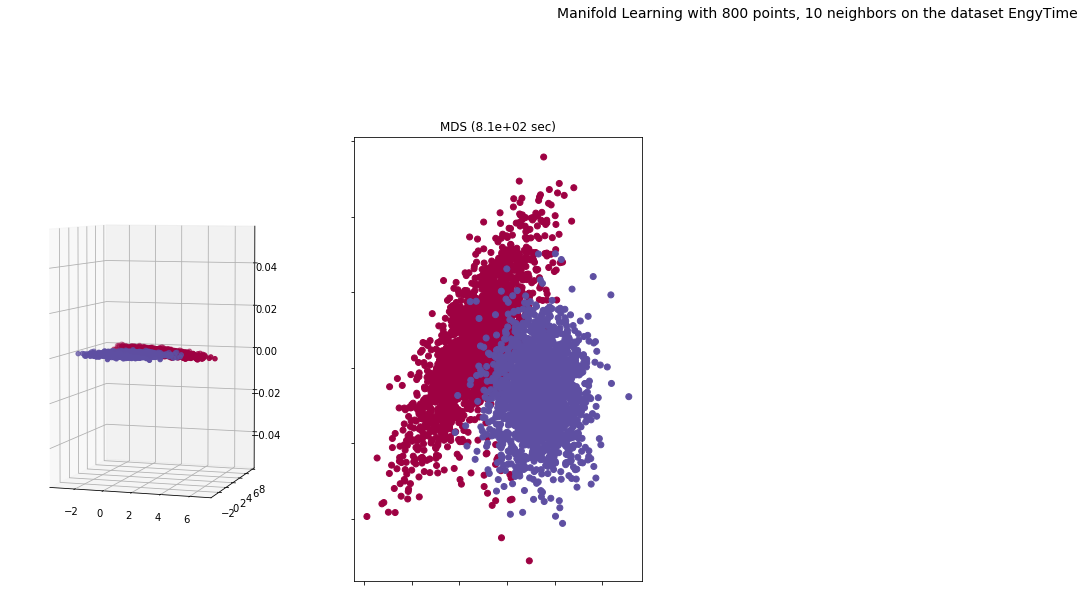

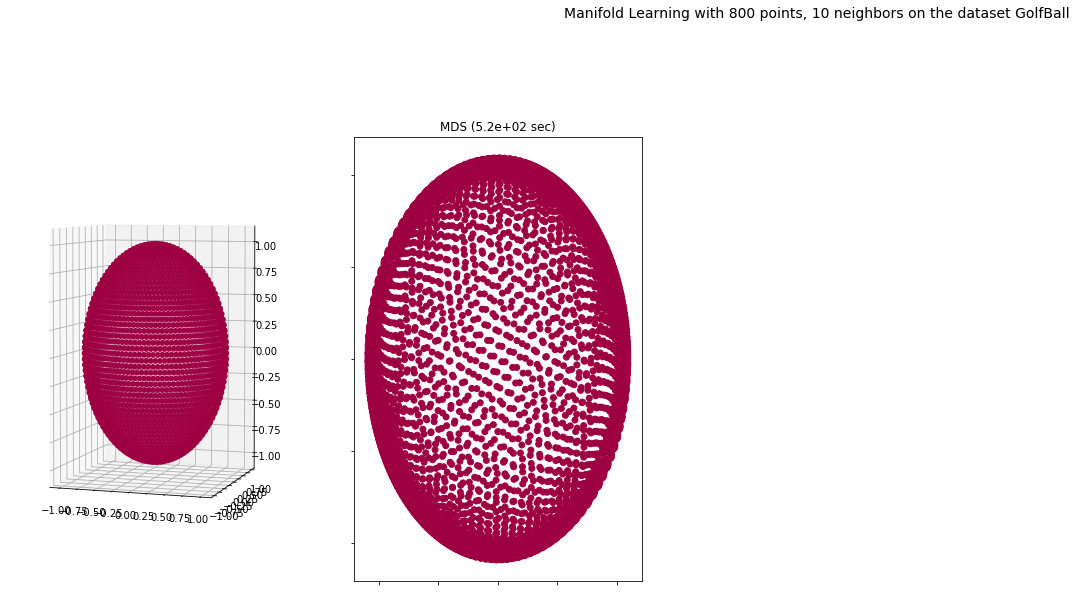

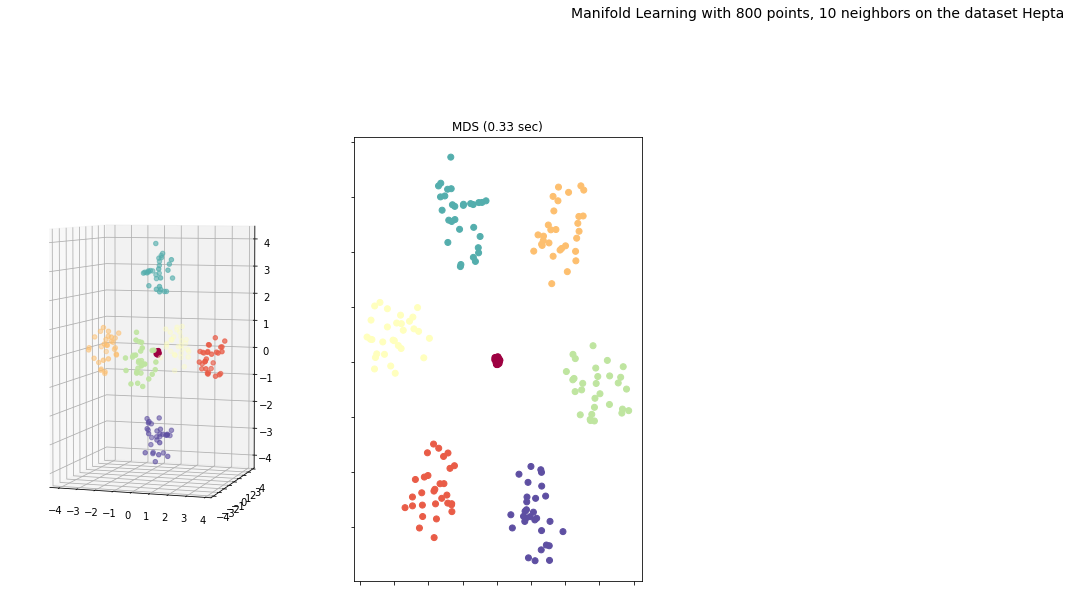

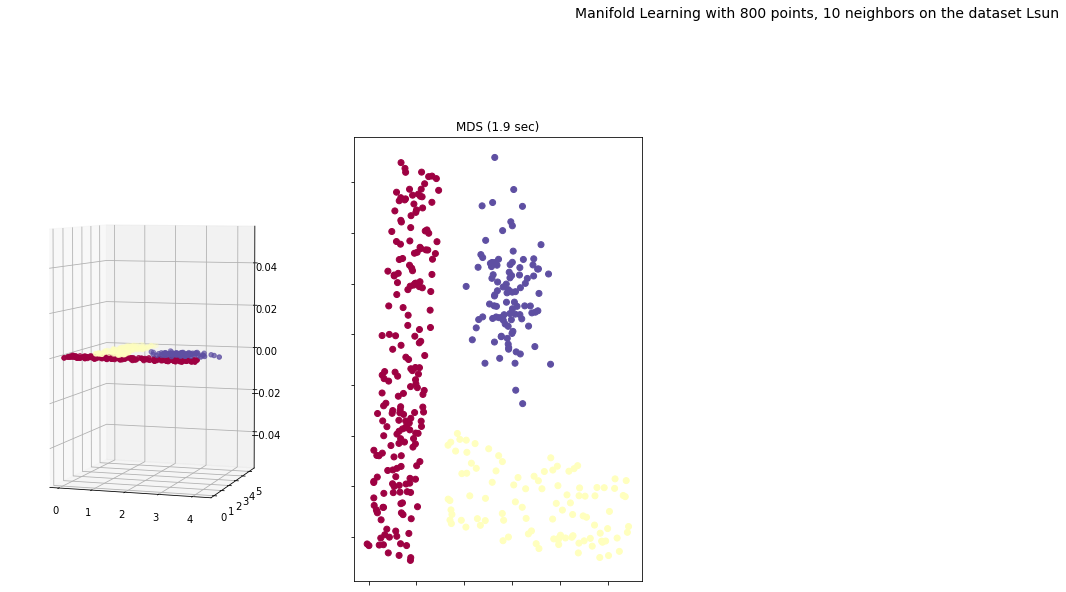

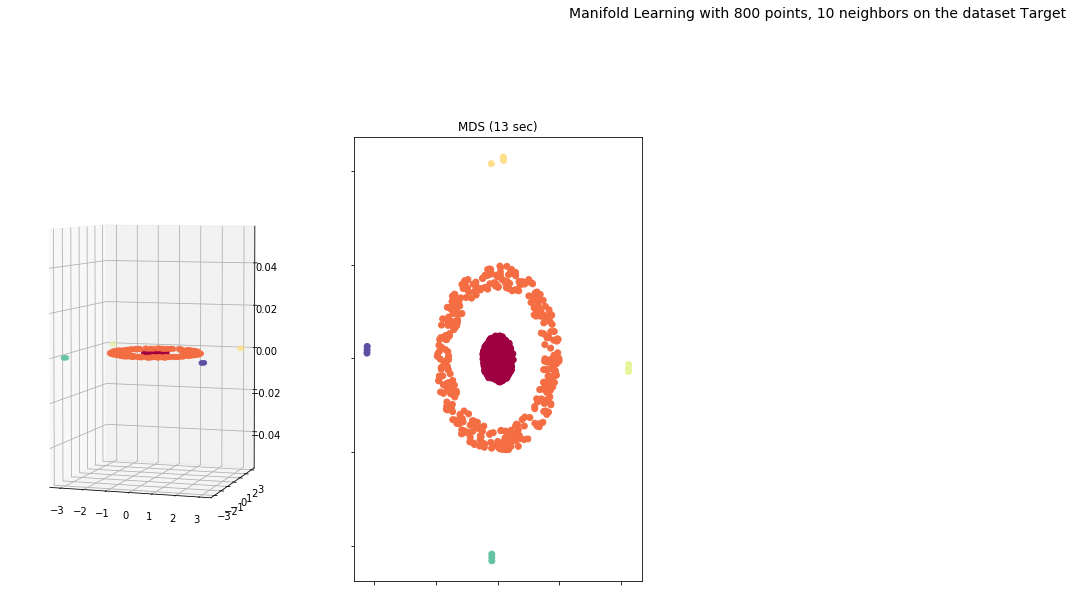

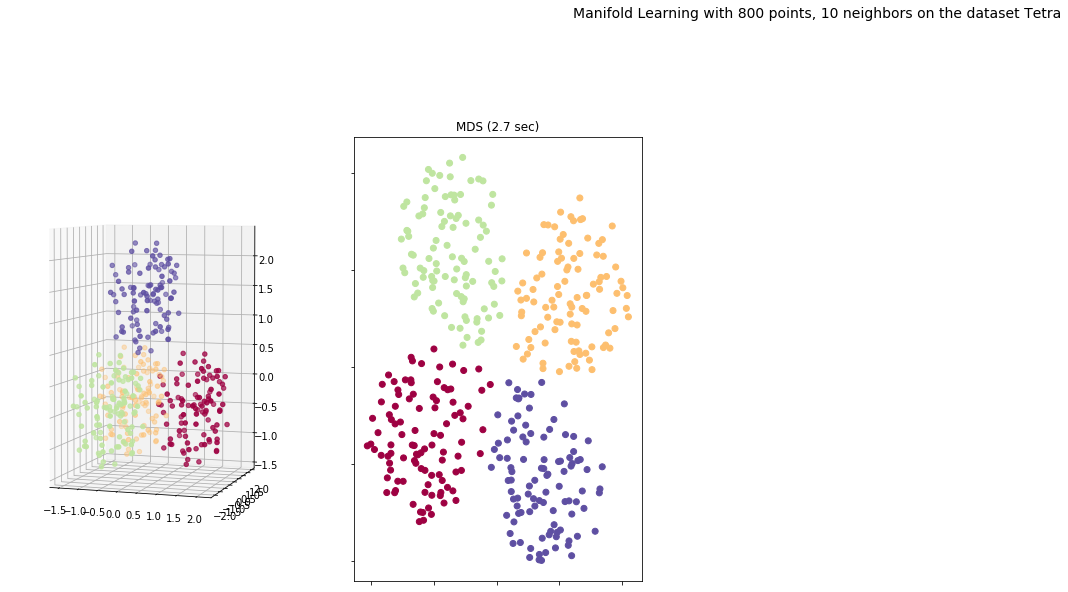

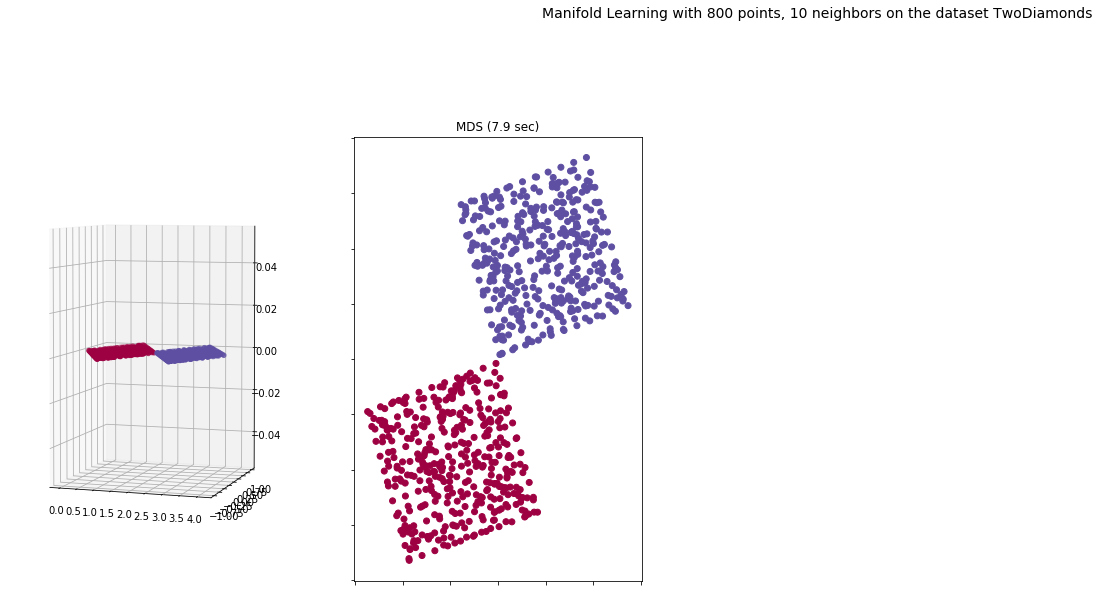

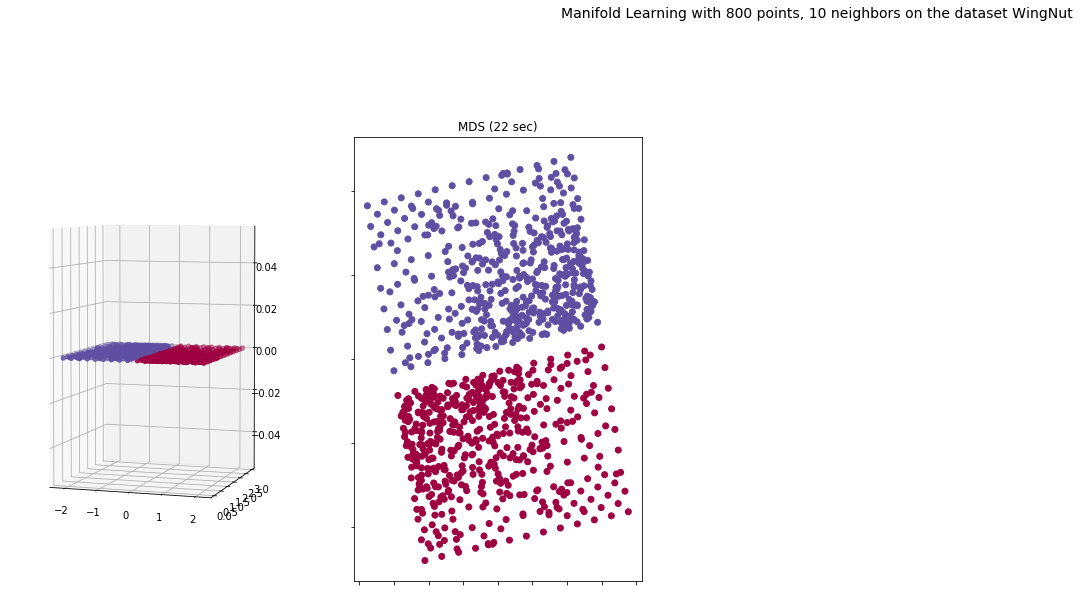

In [2]:
for nom in liste_dataset:
    chemin='D:/m2/reduc/{}.csv'.format(nom)
    
    dataset=pd.read_csv(chemin) 
    if(dataset.shape[1]==4):
        X=dataset.iloc[:,1:3]
        label=dataset.iloc[:,3].values
    else:
        X=dataset.iloc[:,1:4]
        label=dataset.iloc[:,4].values
        

    n_neighbors=10
    n_components=2
    fig = plt.figure(figsize=(30, 18))
    
    plt.suptitle("Manifold Learning with %i points, %i neighbors on the dataset %s"
             % (800, n_neighbors,nom), fontsize=14)


    ax = fig.add_subplot(251, projection='3d')
    if(dataset.shape[1]==4):
        ax.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=label, cmap=plt.cm.Spectral)
    else:
         ax.scatter(X.iloc[:,0].values, X.iloc[:,1].values, X.iloc[:,2].values, c=label, cmap=plt.cm.Spectral)   
    ax.view_init(4, -72)
    t0 = time()
    method='standard'
    Y = embedding = MDS(n_components=2).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (method, t1 - t0))

    ax = fig.add_subplot(252 )
    plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.title("MDS (%.2g sec)" % ( t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())